### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
# Clean up, to prevent mistakes
rm(list=ls())
# Get ggplot, for nicer plots
library(ggplot2)

In [2]:
# Modify how the data's read, so that we can treat the start and end times as dates, not factors. 
ny = read.csv('new_york_city.csv', colClasses=c("integer","character","character","numeric","character","character","character", "character", "numeric"))
ny$Start.Time = as.POSIXlt(ny$Start.Time, format = '%Y-%m-%d %H:%M:%OS', optional = FALSE)
ny$End.Time = as.POSIXlt(ny$End.Time, format = '%Y-%m-%d %H:%M:%OS', optional = FALSE)

wash = read.csv('washington.csv', colClasses=c("integer","character","character","numeric","character","character","character"))
wash$Start.Time = as.POSIXlt(wash$Start.Time, format = '%Y-%m-%d %H:%M:%OS', optional = FALSE)
wash$End.Time = as.POSIXlt(wash$End.Time, format = '%Y-%m-%d %H:%M:%OS', optional = FALSE)

chi = read.csv('chicago.csv', colClasses=c("integer","character","character","numeric","character","character","character", "character", "numeric"))
chi$Start.Time = as.POSIXlt(chi$Start.Time, format = '%Y-%m-%d %H:%M:%OS', optional = FALSE)
chi$End.Time = as.POSIXlt(chi$End.Time, format = '%Y-%m-%d %H:%M:%OS', optional = FALSE)

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Merge the three data frames
Merge the three data frames into one, for ease of analysis. The Washington dataset doesn't have any Gender or Birth Year information, so we add NAs for those columns. In addition, add a categorical variable called `city` for each dataset, denoting which dataset the information came from.

In [6]:
ny$city = 'NYC'
wash$city = 'Washington'
chi$city = 'Chicago'

wash$Gender = NA
wash$Birth.Year = NA

df = rbind(ny, wash, chi)
df$city = as.factor(df$city)
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,city
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NYC
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NYC
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NYC
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NYC
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NYC
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NYC


### Question 1


How does the age distribution of users differ between NYC and Chicago - the two cities where we have user age information?

In [7]:
# Look only at NYC and Chicago for this question.
df1 = subset(df, df$city %in% c('NYC', 'Chicago'))

In [8]:
by(df1$Birth.Year, df1$city, summary) 

df1$city: Chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1899    1975    1984    1981    1989    2002    1747 
------------------------------------------------------------ 
df1$city: NYC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1885    1970    1981    1978    1988    2001    5218 
------------------------------------------------------------ 
df1$city: Washington
NULL

We can see that there are some odd-looking birth years in the data. It's unlikely that there will be many centenarian riders. Some riders also haven't provided their birth year. Calculate the percentage of non-responders on the birth year, for the two cities:

In [9]:
fraction.na = function(x) {
    return(sum(is.na(x))/length(x))
}
by(df1$Birth.Year, df1$User.Type, fraction.na)

df1$User.Type: 
[1] 0.01666667
------------------------------------------------------------ 
df1$User.Type: Customer
[1] 0.8870482
------------------------------------------------------------ 
df1$User.Type: Subscriber
[1] 0.008646563

We can see that the user types `''` and `Customer` have a large fraction of missing `Birth.Year`, whereas the `Subscriber` category has very few. Looking at the [Divvy](https://www.divvybikes.com/system-data) web page, from which the Chicago data is taken, it seems that `Subscriber` is a member of the scheme, whereas the other types may be one-time users which may not be requred to register. Look at how common the different user groups are:

In [10]:
table(df1$User.Type)


             Customer Subscriber 
       120       7304      55976 

Hence, we have (120 + 7304) / 55976 = 13% non-Subscriber observations. Let's focus on the Subscriber category, which represents the bulk of the data and for which we have good age information.

In [11]:
df1 = subset(df1, User.Type == 'Subscriber')

Create a histogram of the age distribution. 

Warning message:
“Removed 484 rows containing non-finite values (stat_bin).”

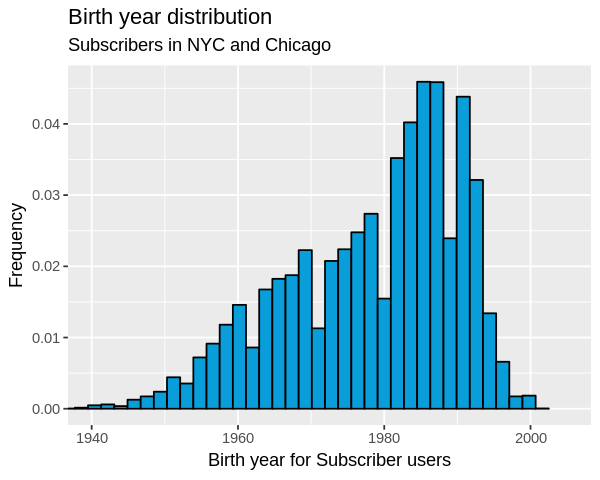

In [12]:
year.min = 1940
year.max = 2005
options(repr.plot.width=5, repr.plot.height=4)
ggplot(aes(x = Birth.Year, y = ..density..), data = df1) +
  geom_histogram(color = 'black', fill = '#099DD9', bins=year.max - year.min + 1) +
  coord_cartesian(xlim = c(year.min, year.max)) + 
  xlab('Birth year for Subscriber users') +
  ylab('Frequency') +
  ggtitle(label = 'Birth year distribution', subtitle = 'Subscribers in NYC and Chicago')

The graph shows that the bike share programmes tend to be relatively more popular with younger people. 

Is there a difference between the genders? We limit the investigation to males and females.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

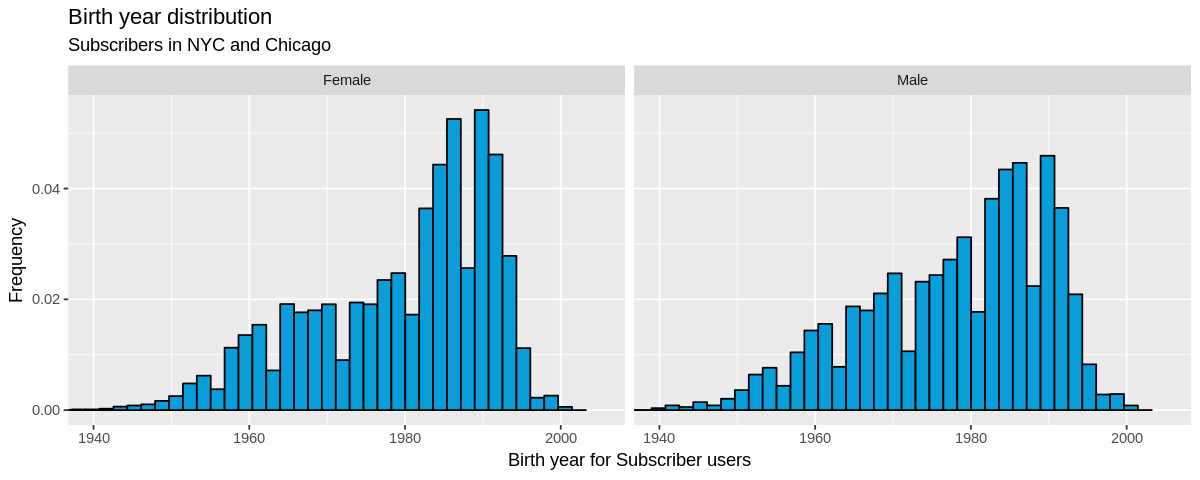

In [13]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(aes(x = Birth.Year, y = ..density..), data = subset(df1, Gender %in% c('Male', 'Female'))) +
  geom_histogram(color = 'black', fill = '#099DD9', bins=year.max - year.min + 1) +
  coord_cartesian(xlim = c(year.min, year.max)) + 
  xlab('Birth year for Subscriber users') +
  ylab('Frequency') +
  ggtitle(label = 'Birth year distribution', subtitle = 'Subscribers in NYC and Chicago') +
  facet_wrap(~Gender)

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

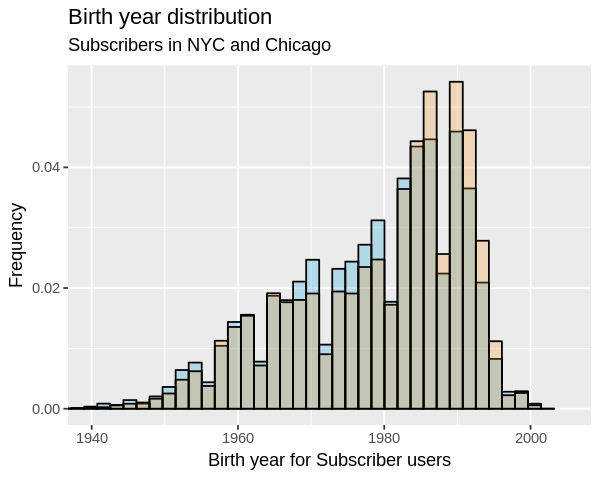

In [14]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(aes(x = Birth.Year, y = ..density..), data = subset(df1, Gender %in% c('Male', 'Female'))) +
  geom_histogram(data=subset(df1, Gender %in% c('Male')), color = 'black', fill = '#099DD9', bins=year.max - year.min + 1, alpha = 0.25 ) +
  geom_histogram(data=subset(df1, Gender %in% c('Female')), color = 'black', fill = '#F79420', bins=year.max - year.min + 1, alpha = 0.25 ) +
  coord_cartesian(xlim = c(year.min, year.max)) + 
  xlab('Birth year for Subscriber users') +
  ylab('Frequency') +
  ggtitle(label = 'Birth year distribution', subtitle = 'Subscribers in NYC and Chicago') 

By overlaying the histograms, we can see that the age distribution is fairly similar between men (blue) and women (orange). There's a tendency to have somewhat more younger women Subscribers. We can put some numbers to the graph as well, as per below: 

In [21]:
df1_1 = subset(df1, Gender %in% c('Male', 'Female'))
by(df1_1$Birth.Year, df1_1$Gender , summary)

df1_1$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1893    1971    1983    1979    1989    2001       1 
------------------------------------------------------------ 
df1_1$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1886    1970    1981    1978    1988    2002 

The table shows that both the mean and median birth years are 1 - 2 years more recent for women. 

### Summary of results
We have birth year data for NYC and Chicago. Birth year data is not of uniform quality in these datasets - it's largely missing for non-Subscriber members. Limiting ourselves to Subscriber members, we note that there are slightly more young women cyclists and slightly more older male users. 

### Question 2

Does the trip duration differ between the three cities?

In [22]:
df2 = df[,c('Trip.Duration', 'User.Type', 'Gender', 'Birth.Year', 'city')]
summary(df2)

 Trip.Duration      User.Type            Gender            Birth.Year   
 Min.   :     60   Length:152451      Length:152451      Min.   :1885   
 1st Qu.:    392   Class :character   Class :character   1st Qu.:1970   
 Median :    667   Mode  :character   Mode  :character   Median :1981   
 Mean   :   1098                                         Mean   :1979   
 3rd Qu.:   1159                                         3rd Qu.:1988   
 Max.   :1088634                                         Max.   :2002   
 NA's   :2                                               NA's   :96016  
         city      
 Chicago   : 8630  
 NYC       :54770  
 Washington:89051  
                   
                   
                   
                   

There seems to be at least one outlier in the data. Have a look at the trip duration distributions by looking at some boxplots.

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

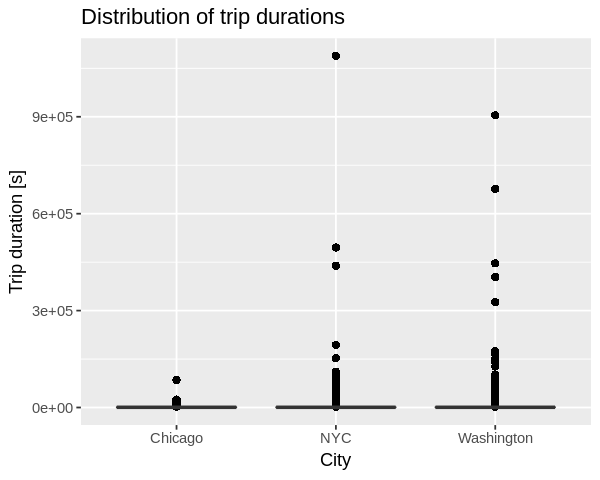

In [23]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(aes(x = city, y=Trip.Duration), data = df2) +
  geom_boxplot(outlier.colour="black", outlier.shape=16,
             outlier.size=2, notch=FALSE) + 
  xlab('City') +
  ylab('Trip duration [s]') +
  ggtitle(label = 'Distribution of trip durations') 

Zoom in a bit, to get rid of the outliers. 

Warning message:
“Removed 23594 rows containing non-finite values (stat_boxplot).”

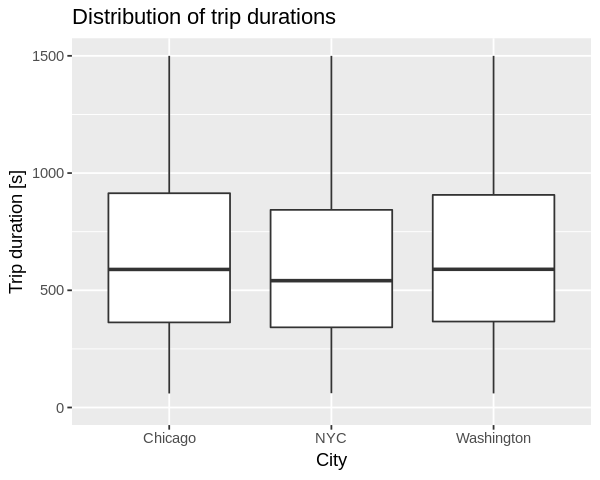

In [24]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(aes(x = city, y=Trip.Duration), data = df2) +
  geom_boxplot(outlier.colour="black", outlier.shape=16,
             outlier.size=2, notch=FALSE) + 
  scale_y_continuous(limits = c(0, 1500))  + 
  xlab('City') +
  ylab('Trip duration [s]') +
  ggtitle(label = 'Distribution of trip durations') 

We can see that Washington appears to have a slightly longer median trip duration. Calculate summary statistics per city, to verify and put some numbers to the graph:

In [25]:
by(df2$Trip.Duration, df2$city, summary)

df2$city: Chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   394.2   670.0   937.2  1119.0 85408.0 
------------------------------------------------------------ 
df2$city: NYC
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 
------------------------------------------------------------ 
df2$city: Washington
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    60.3    410.9    707.0   1234.0   1233.2 904591.4        1 

The summary statistics confirms that the average and median trip times are lowest for NYC and highest for Washington.

### Summary of results
Trip durations vary a little bit between the cities, with Washington having the longest median and average trip durations of the three. NYC trip durations were somewhat shorter on average, but also less dispersed (lower IQR, compared to the other cities. 

### Question 3
Does the usage pattern vary over the week?

In [26]:
df3 = df

Extract some date and time info from the Start.Time field. We'll use that in the following analysis. See `?DateTimeClasses` for info about the POSIXlt class.

In [27]:
# Add a column with the hour the ride started
get.hour = function(x){
    return(x$hour)
}
df3$Start.Hour = sapply(df3$Start.Time, get.hour)

In [28]:
# Add a column with the day of the week the ride took place
get.wday = function(x) {
    dnr = x$wday
    days=c('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday')
    return( days[dnr+1] )
}
df3$Start.DayOfWeek = sapply(df3$Start.Time, get.wday)
# Explicitly order the factor levels, to specify the ordering of the histograms later.
df3$Start.DayOfWeek = factor(df3$Start.DayOfWeek, levels = c('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [29]:
df3 = df3[-which(is.na(df3$Start.Hour)),] # Remove one bad data point

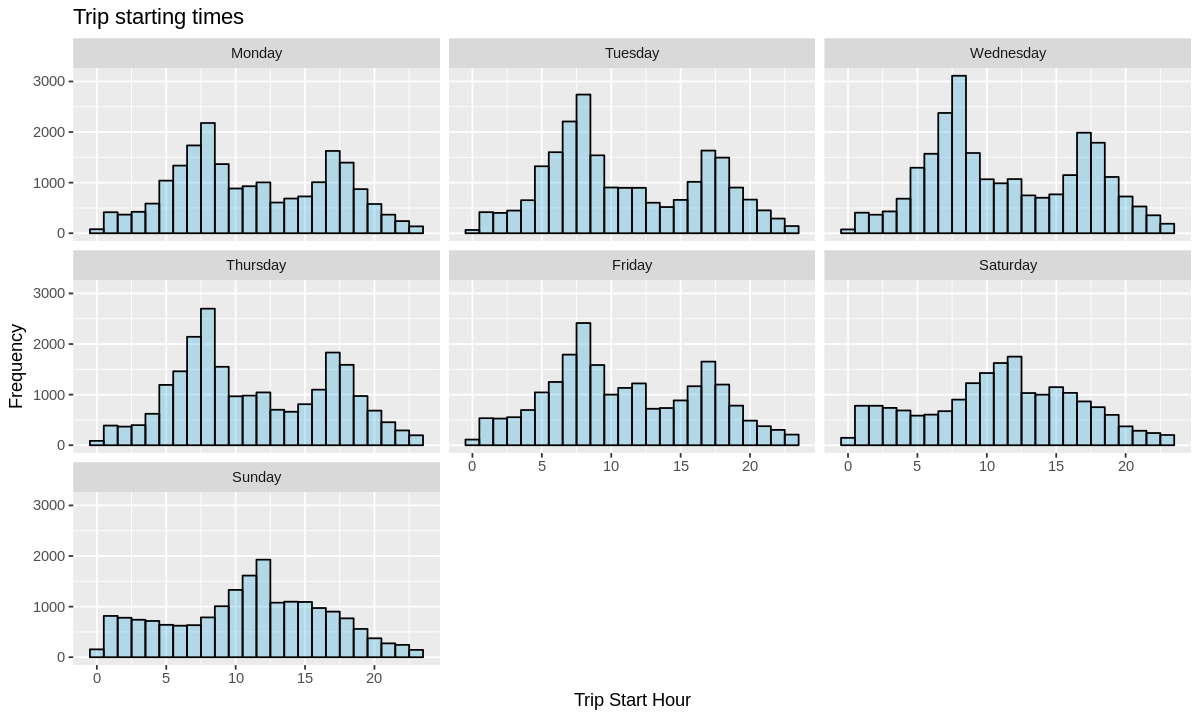

In [30]:
# Plot the start hours for the trips and see how these vary by weekday
options(repr.plot.width=10, repr.plot.height=6)
ggplot(aes(x = Start.Hour), data = df3) +
  geom_histogram(color = 'black', fill = '#099DD9', bins=24, alpha = 0.25 ) +
  xlab('Trip Start Hour') +
  ylab('Frequency') +
  ggtitle(label = 'Trip starting times') +
  facet_wrap(~df3$Start.DayOfWeek)

We can see a pattern where more trips are initiated in the morning and in the evening on weekdays - perhaps because people are renting bicycles to commute to work. The pattern is different on weekends, where we don't have the same marked peaks. For weekends, we instead see more trips in the hours around mid day. 

Let's compare average travel times during weekdays and weekends.

In [31]:
get.weekday.weekend = function(x) {
    if(x %in% c('Monday','Tuesday','Wednesday','Thursday','Friday'))
        return( 'Weekday' )
    else
        return( 'Weekend' )
}
df3$Weekday.Weekend = sapply(df3$Start.DayOfWeek, get.weekday.weekend)

In [44]:
# See how the average trip duration varies with time that the trip starts
# and whether it's a weekend or weekday:
mean.trip = aggregate(Trip.Duration ~ Start.Hour + Weekday.Weekend, FUN=mean, data=df3)
# Create a nice table:
trip.table = rbind(0:23, 
                   mean.trip$Trip.Duration[which(mean.trip$Weekday.Weekend=='Weekday')],
                   mean.trip$Trip.Duration[which(mean.trip$Weekday.Weekend=='Weekend')])
rownames(trip.table) = c('Start Hour', 'Weekday', 'Weekend')
t(trip.table)

Start Hour,Weekday,Weekend
0,731.6361,1242.3162
1,1468.6146,1753.1005
2,1825.3897,1984.2885
3,1328.8433,1739.7129
4,1162.8072,1844.4448
5,998.2624,1583.8444
6,968.8872,1380.9239
7,844.4758,1795.5745
8,815.5595,1331.7416
9,929.8828,1333.6882


The table shows some interesting numbers, e.g. even though most weekday trips take place around 7 in the morning and 17 in the evening (+/- 1 hour, roughly), we note that the average trip durations during those times are only about 800 - 900 seconds. This is kind of stuff can be interesting when dimensioning the bicycle hiring service - perhaps there's less of a need to add bicycles to cover the rush hours, since the average usage time is lower? To properly answer that would require a more thorough investigation, including actual start and end points for the trips. We don't do that here.

### Summary of results
We can see that there are different usage patterns during weekdays and weekends. During weekdays, there are two usage peaks - one in the morning and one in the evening - potentially corresponding to commute times. During weekends, there's one peak, centered around mid day. We also see that the average usage time is in the range 800 - 900 seconds during weekday rush hour.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')

# This markdown cell was added to the end of the ipynb file.